In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans, AgglomerativeClustering
#from tensorflow.keras.datasets import cifar10 
from keras.datasets import fashion_mnist 
from sklearn.metrics import silhouette_samples, silhouette_score

mod = sys.modules[__name__]

## main_num_dataset = 200
## other_num_dataset = 0

In [1]:
acc0 = [[0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.10719999670982361, 0.0982000008225441, 0.14890000224113464, 0.1031000018119812, 0.1023000031709671, 0.09880000352859497, 0.10400000214576721, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.10970000177621841, 0.1436000019311905, 0.10130000114440918, 0.14270000159740448, 0.0982000008225441, 0.11599999666213989, 0.1421000063419342, 0.14350000023841858, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.14839999377727509, 0.0982000008225441, 0.09860000014305115, 0.0982000008225441, 0.10679999738931656, 0.14239999651908875, 0.10599999874830246, 0.10949999839067459, 0.14640000462532043], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.1965000033378601, 0.19439999759197235, 0.19580000638961792, 0.19599999487400055, 0.19480000436306, 0.19930000603199005, 0.19830000400543213, 0.19629999995231628, 0.1964000016450882, 0.19699999690055847, 0.19609999656677246, 0.19609999656677246, 0.1987999975681305, 0.19679999351501465, 0.19629999995231628, 0.195700004696846, 0.19580000638961792, 0.19449999928474426, 0.19480000436306, 0.19740000367164612, 0.19699999690055847, 0.20020000636577606, 0.19460000097751617, 0.19370000064373016, 0.19789999723434448, 0.19519999623298645, 0.19580000638961792, 0.19920000433921814, 0.1964000016450882, 0.20059999823570251], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441]]
loss0 = [[252.8803253173828, 253.62802124023438, 234.8139190673828, 240.0542755126953, 239.9076690673828, 263.434814453125, 239.215576171875, 265.7569580078125, 246.25497436523438, 244.5791015625, 216.17030334472656, 239.26617431640625, 260.7879333496094, 253.89805603027344, 238.66140747070312, 230.13995361328125, 242.4677276611328, 236.5229949951172, 238.718017578125, 231.68572998046875, 247.43582153320312, 248.79339599609375, 225.2319793701172, 243.83412170410156, 255.0748291015625, 251.69032287597656, 234.655517578125, 237.4144744873047, 234.0384063720703, 243.8031005859375], [230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656, 230.90565490722656], [2.313826084136963, 2.313049793243408, 2.313814163208008, 2.3137896060943604, 2.312809467315674, 2.3157026767730713, 2.3103458881378174, 2.3150634765625, 2.314188003540039, 2.312575101852417, 2.3128669261932373, 2.3151397705078125, 2.3150203227996826, 2.311116933822632, 2.314948320388794, 2.3111987113952637, 2.314757823944092, 2.31349778175354, 2.3118503093719482, 2.313497543334961, 2.3123302459716797, 2.3157856464385986, 2.311291456222534, 2.3155341148376465, 2.3143746852874756, 2.3129384517669678, 2.31290340423584, 2.317192316055298, 2.3103129863739014, 2.312438726425171], [94.28460693359375, 94.51408386230469, 90.50251007080078, 92.70366668701172, 87.98979949951172, 92.82538604736328, 92.35027313232422, 89.70722961425781, 87.62989044189453, 94.85499572753906, 91.72398376464844, 90.6884536743164, 93.97351837158203, 92.96441650390625, 90.27214050292969, 94.6136474609375, 98.0501480102539, 91.98648834228516, 94.0843276977539, 89.96023559570312, 89.17371368408203, 91.77445220947266, 88.98949432373047, 94.53970336914062, 90.70912170410156, 94.83768463134766, 92.91344451904297, 92.01677703857422, 92.6658935546875, 91.86851501464844], [2.3029282093048096, 2.302898406982422, 2.302910566329956, 2.302949905395508, 2.302924394607544, 2.3028981685638428, 2.302879571914673, 2.3029229640960693, 2.3029258251190186, 2.3029587268829346, 2.3029274940490723, 2.302889108657837, 2.3028979301452637, 2.3029634952545166, 2.3029074668884277, 2.302969455718994, 2.3029630184173584, 2.3029117584228516, 2.3029701709747314, 2.302875280380249, 2.3029122352600098, 2.302924633026123, 2.302901268005371, 2.302913188934326, 2.3029000759124756, 2.3029751777648926, 2.302905559539795, 2.3029329776763916, 2.302882671356201, 2.3029232025146484], [8.253843307495117, 10.54422664642334, 11.838583946228027, 12.359596252441406, 11.835336685180664, 8.151540756225586, 11.624492645263672, 11.69092845916748, 11.473749160766602, 12.215530395507812, 7.947571754455566, 11.594687461853027, 11.710984230041504, 12.232799530029297, 8.109628677368164, 12.484612464904785, 12.243714332580566, 8.174918174743652, 11.851339340209961, 12.068862915039062, 11.730148315429688, 11.844815254211426, 12.054581642150879, 12.599516868591309, 11.853339195251465, 8.12398624420166, 11.394662857055664, 11.993280410766602, 7.881021022796631, 12.116169929504395], [2.3057916164398193, 2.306077003479004, 2.3059120178222656, 2.3061444759368896, 2.305678606033325, 2.3056180477142334, 2.3059804439544678, 2.305985450744629, 2.3061702251434326, 2.3062453269958496, 2.305574655532837, 2.306133508682251, 2.3059890270233154, 2.305938482284546, 2.305907726287842, 2.305861473083496, 2.306107997894287, 2.305910587310791, 2.3060665130615234, 2.3062291145324707, 2.3064072132110596, 2.306011199951172, 2.3058056831359863, 2.3060383796691895, 2.305851936340332, 2.3063042163848877, 2.3059725761413574, 2.306077003479004, 2.3059277534484863, 2.3059659004211426], [43.88262939453125, 45.56196212768555, 44.58198928833008, 46.5509033203125, 45.028324127197266, 44.25365447998047, 44.91458511352539, 46.64073181152344, 43.79642868041992, 44.60619354248047, 44.6184196472168, 47.325111389160156, 46.61454391479492, 44.577423095703125, 44.11548614501953, 45.42412567138672, 44.394004821777344, 43.351871490478516, 45.210384368896484, 44.40263366699219, 43.90001678466797, 44.67075729370117, 44.99494552612305, 45.65262985229492, 46.80831527709961, 45.211429595947266, 44.742149353027344, 45.18824768066406, 43.60456085205078, 45.922821044921875], [79.31251525878906, 81.42945861816406, 100.26641082763672, 82.80418395996094, 86.064697265625, 105.2797622680664, 85.22225952148438, 125.6479263305664, 90.67943572998047, 101.50080108642578, 93.34260559082031, 109.11978912353516, 128.93975830078125, 104.16896057128906, 90.3262939453125, 86.9377212524414, 107.39393615722656, 93.24490356445312, 96.22823333740234, 102.30438232421875, 91.30519104003906, 88.08116149902344, 82.29969787597656, 108.5605239868164, 93.2631607055664, 89.44408416748047, 101.818603515625, 91.98865509033203, 91.66751098632812, 90.42606353759766], [95.54789733886719, 95.54849243164062, 95.54910278320312, 95.54796600341797, 95.54761505126953, 95.54792785644531, 95.54764556884766, 95.54766845703125, 95.54779052734375, 95.54927062988281, 95.55034637451172, 95.54769897460938, 95.54766845703125, 95.54778289794922, 95.54761505126953, 95.54764556884766, 95.56307220458984, 95.54928588867188, 95.5482406616211, 95.55332946777344, 95.5537109375, 95.54766845703125, 95.56238555908203, 95.54762268066406, 95.54761505126953, 95.547607421875, 95.54814910888672, 95.54789733886719, 95.54827117919922, 95.54762268066406], [2.5715131759643555, 2.546590566635132, 2.608046293258667, 2.576478958129883, 2.5703954696655273, 2.565654993057251, 2.5683586597442627, 2.566488265991211, 2.5348193645477295, 2.5625252723693848, 2.5845532417297363, 2.6177279949188232, 2.5703125, 2.627598524093628, 2.5731756687164307, 2.641338348388672, 2.604355573654175, 2.6134567260742188, 2.554732322692871, 2.5622217655181885, 2.5715432167053223, 2.6046688556671143, 2.5495409965515137, 2.561544895172119, 2.5459282398223877, 2.590949296951294, 2.61329984664917, 2.5690836906433105, 2.576993465423584, 2.6161868572235107], [70.0732650756836, 70.66143035888672, 69.9988784790039, 69.27516174316406, 69.46346282958984, 68.86023712158203, 66.43389892578125, 68.59812927246094, 68.61956787109375, 68.87385559082031, 68.95562744140625, 67.66075897216797, 69.45724487304688, 67.78860473632812, 67.89337158203125, 70.51712799072266, 69.04672241210938, 67.04046630859375, 69.69951629638672, 66.67066955566406, 70.30722045898438, 67.06455993652344, 69.63835906982422, 68.16081237792969, 69.37928009033203, 69.88883209228516, 69.10806274414062, 68.72447204589844, 70.14466857910156, 65.8453598022461], [2.3789544105529785, 2.3775107860565186, 2.3841805458068848, 2.3824660778045654, 2.382350206375122, 2.3846006393432617, 2.3898768424987793, 2.380608320236206, 2.3810770511627197, 2.3802809715270996, 2.383887529373169, 2.383310079574585, 2.384310245513916, 2.3774237632751465, 2.3803200721740723, 2.3878378868103027, 2.382357358932495, 2.376377820968628, 2.377807855606079, 2.3883819580078125, 2.3805129528045654, 2.3840432167053223, 2.3784170150756836, 2.379197359085083, 2.3864715099334717, 2.3797190189361572, 2.3794872760772705, 2.3834614753723145, 2.3795008659362793, 2.3873488903045654], [64.4957504272461, 64.04327392578125, 62.67982482910156, 62.768001556396484, 63.282188415527344, 64.02115631103516, 63.47663116455078, 62.74104309082031, 65.79607391357422, 64.9847412109375, 63.61945724487305, 62.51909255981445, 65.23210144042969, 63.234169006347656, 64.2409896850586, 64.3855972290039, 62.05148696899414, 62.410430908203125, 65.86990356445312, 62.11098098754883, 63.464149475097656, 61.00986862182617, 63.930450439453125, 61.543701171875, 64.68751525878906, 61.346214294433594, 62.44547653198242, 64.21292877197266, 64.04315185546875, 62.57286071777344], [2.318556547164917, 2.3184385299682617, 2.320312976837158, 2.318847179412842, 2.3184566497802734, 2.320138692855835, 2.3197858333587646, 2.3210577964782715, 2.320040464401245, 2.3204100131988525, 2.3204429149627686, 2.3198349475860596, 2.3190815448760986, 2.3198347091674805, 2.318845272064209, 2.319676160812378, 2.319352626800537, 2.3182127475738525, 2.3180654048919678, 2.3199996948242188, 2.318622589111328, 2.3190407752990723, 2.319483995437622, 2.3200185298919678, 2.3205854892730713, 2.318964958190918, 2.3204126358032227, 2.318498134613037, 2.318697214126587, 2.3184216022491455], [11.946257591247559, 11.175813674926758, 9.0626859664917, 10.578180313110352, 13.330224990844727, 10.491768836975098, 10.218219757080078, 12.330702781677246, 13.449620246887207, 11.265262603759766, 11.657626152038574, 10.229535102844238, 12.210798263549805, 11.666497230529785, 14.380945205688477, 12.299925804138184, 12.222131729125977, 11.693655967712402, 13.317453384399414, 13.306591987609863, 12.50860595703125, 11.83488941192627, 12.028533935546875, 12.365806579589844, 10.305173873901367, 9.876842498779297, 11.498926162719727, 14.837212562561035, 9.74019718170166, 9.24498176574707], [2.454770803451538, 2.4577863216400146, 2.4783427715301514, 2.4546866416931152, 2.456434726715088, 2.4502205848693848, 2.4643046855926514, 2.465909004211426, 2.4616239070892334, 2.472020387649536, 2.4631800651550293, 2.4595067501068115, 2.4734442234039307, 2.4708774089813232, 2.455606698989868, 2.4604389667510986, 2.453664541244507, 2.453047513961792, 2.462792158126831, 2.455505609512329, 2.473719835281372, 2.462763786315918, 2.4662528038024902, 2.4569897651672363, 2.450545310974121, 2.456282615661621, 2.4579875469207764, 2.455353021621704, 2.4603753089904785, 2.4717342853546143], [40.60487747192383, 39.16493606567383, 41.36834716796875, 41.050933837890625, 40.46761703491211, 41.037879943847656, 44.0035514831543, 39.895103454589844, 40.332969665527344, 41.13338851928711, 39.97256088256836, 40.50112533569336, 40.47531509399414, 39.551883697509766, 40.15584945678711, 39.517738342285156, 42.542510986328125, 40.431732177734375, 40.64613723754883, 39.496543884277344, 40.572635650634766, 40.43913650512695, 40.263946533203125, 40.41304397583008, 40.71388626098633, 41.45671463012695, 40.62495040893555, 39.92283248901367, 40.17075729370117, 40.05502700805664], [42.654136657714844, 41.819969177246094, 44.38795471191406, 43.12646484375, 40.800838470458984, 43.59659194946289, 40.46188735961914, 40.796688079833984, 40.8063850402832, 40.49283218383789, 40.8429069519043, 51.83546829223633, 48.11477279663086, 41.77602005004883, 47.611656188964844, 40.52327346801758, 44.478981018066406, 42.265323638916016, 44.60776901245117, 40.776241302490234, 51.66162109375, 40.62037658691406, 40.728572845458984, 52.6215934753418, 40.362701416015625, 40.451210021972656, 40.40209197998047, 42.35566329956055, 44.1552734375, 50.9985466003418], [43.841487884521484, 43.50852584838867, 43.55409622192383, 45.86512756347656, 43.488155364990234, 43.4572639465332, 43.90949249267578, 43.441917419433594, 43.722896575927734, 43.57235336303711, 43.52154541015625, 43.56822967529297, 50.82451629638672, 43.47334671020508, 43.4688835144043, 60.82768630981445, 45.1748161315918, 43.905147552490234, 43.46571731567383, 43.93450164794922, 43.78720474243164, 43.857093811035156, 47.205448150634766, 47.468223571777344, 43.50517654418945, 43.623817443847656, 43.45945358276367, 43.50031661987305, 43.50347900390625, 44.741817474365234]] 

acc1 = [[0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.13850000500679016, 0.121799997985363, 0.15320000052452087, 0.1573999971151352, 0.15459999442100525, 0.16040000319480896, 0.14910000562667847, 0.11919999867677689, 0.15060000121593475, 0.14720000326633453, 0.1509000062942505, 0.1420000046491623, 0.14730000495910645, 0.15070000290870667, 0.15279999375343323, 0.15119999647140503, 0.15029999613761902, 0.1446000039577484, 0.14830000698566437, 0.12049999833106995, 0.1289999932050705, 0.1298000067472458, 0.14970000088214874, 0.15710000693798065, 0.11100000143051147, 0.16300000250339508, 0.15940000116825104, 0.14650000631809235, 0.15539999306201935, 0.15729999542236328], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.10279999673366547, 0.10279999673366547, 0.13339999318122864, 0.10270000249147415, 0.10279999673366547, 0.10279999673366547, 0.10270000249147415, 0.10279999673366547, 0.10279999673366547, 0.1378999948501587, 0.10279999673366547, 0.10279999673366547, 0.0997999981045723, 0.10989999771118164, 0.11330000311136246, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.1177000030875206, 0.12349999696016312, 0.10279999673366547, 0.12290000170469284, 0.14409999549388885, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.13199999928474426, 0.10279999673366547], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212]]
loss1 = [[322.2532043457031, 299.81353759765625, 298.9599609375, 311.1573791503906, 311.95233154296875, 308.3546142578125, 299.8390808105469, 305.57183837890625, 300.6318054199219, 297.6881103515625, 315.80560302734375, 305.3597106933594, 347.3664855957031, 334.30523681640625, 304.5748596191406, 306.8699645996094, 321.6520080566406, 305.4818420410156, 301.7302551269531, 321.3459167480469, 326.40423583984375, 319.98114013671875, 301.5792236328125, 303.40899658203125, 303.16925048828125, 298.4495849609375, 320.46630859375, 305.315673828125, 303.6326599121094, 293.7518615722656], [302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875, 302.27947998046875], [2.3026487827301025, 2.3026678562164307, 2.3026578426361084, 2.3027327060699463, 2.3026270866394043, 2.3019118309020996, 2.302556037902832, 2.3026084899902344, 2.3026533126831055, 2.302621841430664, 2.3026726245880127, 2.3026301860809326, 2.302576780319214, 2.3026585578918457, 2.302621603012085, 2.3026621341705322, 2.3026256561279297, 2.3026390075683594, 2.3026013374328613, 2.302635431289673, 2.302631378173828, 2.3026139736175537, 2.302605390548706, 2.302691698074341, 2.3026065826416016, 2.302694082260132, 2.3026585578918457, 2.3026928901672363, 2.3026175498962402, 2.3026344776153564], [108.54833984375, 118.411376953125, 117.02678680419922, 114.16448974609375, 117.04231262207031, 110.6446762084961, 122.4415512084961, 111.79855346679688, 115.87118530273438, 115.94080352783203, 116.56346130371094, 112.43734741210938, 117.2838134765625, 120.97254943847656, 118.96346282958984, 108.53548431396484, 124.39216613769531, 119.5448226928711, 115.60547637939453, 114.61019897460938, 114.92363739013672, 111.70543670654297, 115.8641357421875, 119.79315948486328, 114.53113555908203, 117.4109878540039, 110.31068420410156, 118.9647216796875, 118.66694641113281, 112.03646087646484], [2.3017001152038574, 2.3031163215637207, 2.302114725112915, 2.301724672317505, 2.301924467086792, 2.3710262775421143, 2.301678419113159, 2.303175210952759, 2.3026139736175537, 2.3690872192382812, 2.3521196842193604, 2.3017578125, 2.3025972843170166, 2.3684561252593994, 2.347078561782837, 2.3776705265045166, 2.301745891571045, 2.302036762237549, 2.3017659187316895, 2.3509137630462646, 2.302159547805786, 2.3018271923065186, 2.302568197250366, 2.302999973297119, 2.3017032146453857, 2.3746721744537354, 2.302597761154175, 2.301800489425659, 2.3017444610595703, 2.3011250495910645], [9.334698677062988, 7.912983417510986, 8.930729866027832, 8.78024959564209, 8.773629188537598, 9.134840965270996, 8.391558647155762, 8.137688636779785, 8.800108909606934, 8.237237930297852, 8.218467712402344, 9.003575325012207, 8.80661678314209, 8.76653003692627, 8.501517295837402, 8.637142181396484, 8.422240257263184, 8.787958145141602, 8.658313751220703, 8.390412330627441, 8.661535263061523, 8.661867141723633, 8.959060668945312, 8.666451454162598, 8.422771453857422, 8.38318157196045, 9.846245765686035, 8.109329223632812, 8.754854202270508, 8.476269721984863], [2.3009114265441895, 2.3007497787475586, 2.300910711288452, 2.3007771968841553, 2.301048755645752, 2.30084228515625, 2.3008337020874023, 2.300837755203247, 2.3009562492370605, 2.30062198638916, 2.3008549213409424, 2.300948143005371, 2.3007652759552, 2.3009843826293945, 2.300769329071045, 2.3010058403015137, 2.300929069519043, 2.30094051361084, 2.3008830547332764, 2.3007283210754395, 2.3006997108459473, 2.3008551597595215, 2.3008930683135986, 2.300823926925659, 2.301166534423828, 2.3010714054107666, 2.300905227661133, 2.3007147312164307, 2.300823211669922, 2.300898313522339], [7.189979553222656, 6.986966609954834, 7.875650882720947, 7.920486927032471, 7.095555305480957, 6.726289749145508, 7.035059452056885, 5.947734832763672, 7.9041337966918945, 7.0641560554504395, 5.444321155548096, 8.117436408996582, 6.562619686126709, 8.363194465637207, 6.061437129974365, 6.422807216644287, 7.009781837463379, 6.072865009307861, 5.973476886749268, 7.339831352233887, 8.060503959655762, 7.321848392486572, 7.025697708129883, 7.327572822570801, 7.222877502441406, 7.331408500671387, 7.183506965637207, 5.822964668273926, 6.621743679046631, 5.668100833892822], [45.44913101196289, 46.468894958496094, 45.713661193847656, 46.63999557495117, 45.93453598022461, 45.3061637878418, 48.260772705078125, 47.474369049072266, 44.655696868896484, 46.879451751708984, 52.96433639526367, 47.420448303222656, 47.13581085205078, 52.897666931152344, 48.69689178466797, 44.8831787109375, 43.603450775146484, 43.855098724365234, 43.54899215698242, 45.17039489746094, 46.633426666259766, 45.06245040893555, 45.34246063232422, 45.955604553222656, 48.06080627441406, 45.886878967285156, 46.43028259277344, 46.360862731933594, 47.21897888183594, 44.22509765625], [45.88192367553711, 45.83469009399414, 45.84083557128906, 45.83169937133789, 45.832645416259766, 45.86370849609375, 47.392696380615234, 45.83354187011719, 45.833099365234375, 45.90745162963867, 45.85865020751953, 45.9163703918457, 45.832489013671875, 45.8336296081543, 45.88683319091797, 45.83163833618164, 45.84016799926758, 45.83824157714844, 48.93391036987305, 45.9113883972168, 45.831485748291016, 45.89471435546875, 45.83314514160156, 45.886295318603516, 45.878753662109375, 45.850826263427734, 45.83115768432617, 45.83893585205078, 45.84465408325195, 45.83864212036133], [2.317683219909668, 2.317924737930298, 2.3178889751434326, 2.316887617111206, 2.3194406032562256, 2.319133996963501, 2.3157920837402344, 2.320133924484253, 2.3160886764526367, 2.318891763687134, 2.319211959838867, 2.3191733360290527, 2.320039987564087, 2.3176169395446777, 2.3163766860961914, 2.3179521560668945, 2.317167282104492, 2.3198626041412354, 2.3170902729034424, 2.3173489570617676, 2.319267749786377, 2.31970477104187, 2.3171353340148926, 2.3167736530303955, 2.3183794021606445, 2.3166701793670654, 2.3163816928863525, 2.3186094760894775, 2.318512439727783, 2.317429780960083], [40.4832649230957, 40.09877395629883, 40.20608139038086, 39.8873405456543, 40.580596923828125, 39.507347106933594, 40.61932373046875, 40.361839294433594, 40.99259948730469, 41.11955261230469, 41.2651252746582, 40.53631591796875, 40.175025939941406, 39.922794342041016, 41.220001220703125, 41.21730041503906, 39.68502426147461, 40.79685592651367, 40.761016845703125, 40.746910095214844, 40.22590637207031, 42.05554962158203, 40.36726379394531, 40.4532585144043, 40.70117950439453, 41.46812057495117, 40.306331634521484, 39.88487243652344, 40.210750579833984, 40.30664825439453], [2.4315927028656006, 2.4167349338531494, 2.400017499923706, 2.4043283462524414, 2.472033977508545, 2.4556145668029785, 2.3939366340637207, 2.5253984928131104, 2.480947971343994, 2.3897604942321777, 2.479403257369995, 2.4090306758880615, 2.377927780151367, 2.3926522731781006, 2.376159429550171, 2.4604973793029785, 2.5367870330810547, 2.429612636566162, 2.3709378242492676, 2.3752951622009277, 2.4473958015441895, 2.3954718112945557, 2.385380268096924, 2.4024739265441895, 2.3956120014190674, 2.4798169136047363, 2.4486026763916016, 2.4389967918395996, 2.382368564605713, 2.449751377105713], [30.05217742919922, 30.300825119018555, 31.755491256713867, 29.99015998840332, 33.133262634277344, 32.975685119628906, 32.255489349365234, 33.69765090942383, 30.713193893432617, 31.80992889404297, 30.99875259399414, 31.77431869506836, 31.540212631225586, 33.19868087768555, 30.79592514038086, 30.754972457885742, 30.88966941833496, 26.910612106323242, 35.63434982299805, 32.20828628540039, 30.69120979309082, 32.53655242919922, 28.607255935668945, 31.205821990966797, 30.99871826171875, 28.633337020874023, 31.84373664855957, 29.145984649658203, 31.058971405029297, 32.1883430480957], [2.36743426322937, 2.373534679412842, 2.370682716369629, 2.368072271347046, 2.3665003776550293, 2.3752901554107666, 2.3698270320892334, 2.363973379135132, 2.3716797828674316, 2.378286123275757, 2.3777945041656494, 2.3676860332489014, 2.3696916103363037, 2.3668997287750244, 2.3710806369781494, 2.368618965148926, 2.377197265625, 2.366100311279297, 2.367295980453491, 2.369032621383667, 2.368577480316162, 2.370668649673462, 2.373396873474121, 2.3673102855682373, 2.3662447929382324, 2.365370750427246, 2.367764472961426, 2.370231866836548, 2.370887279510498, 2.373126268386841], [7.711061000823975, 7.203558444976807, 7.7957763671875, 7.259296894073486, 7.781389236450195, 7.635383605957031, 7.866086483001709, 6.843989849090576, 7.991853713989258, 7.160843849182129, 7.527571678161621, 7.9348063468933105, 7.417498588562012, 6.980495452880859, 7.58610725402832, 7.226606369018555, 7.596324920654297, 7.738151550292969, 7.179939270019531, 7.82058048248291, 7.395097732543945, 7.470195293426514, 7.25343132019043, 7.27677583694458, 7.70098352432251, 7.241453170776367, 7.488670349121094, 7.902524948120117, 7.469387531280518, 7.9044928550720215], [2.541400194168091, 2.511467218399048, 2.556057929992676, 2.526524543762207, 2.5526227951049805, 2.5363118648529053, 2.5456414222717285, 2.5224568843841553, 2.5375614166259766, 2.5432188510894775, 2.5385265350341797, 2.5541460514068604, 2.517446994781494, 2.521062135696411, 2.550515651702881, 2.5319430828094482, 2.5546138286590576, 2.5213985443115234, 2.541410207748413, 2.517852783203125, 2.5148229598999023, 2.5212931632995605, 2.546159267425537, 2.5104682445526123, 2.547823905944824, 2.5393571853637695, 2.5606932640075684, 2.529844284057617, 2.5518057346343994, 2.5611572265625], [61.44276428222656, 61.70621109008789, 62.162330627441406, 61.58281707763672, 61.936012268066406, 63.65216827392578, 61.286495208740234, 62.549476623535156, 61.44895553588867, 61.707637786865234, 60.503299713134766, 62.99836730957031, 62.213680267333984, 63.134281158447266, 61.39518737792969, 62.46506118774414, 63.229949951171875, 62.96742630004883, 62.037376403808594, 63.227561950683594, 62.265193939208984, 62.398067474365234, 61.228885650634766, 60.8785514831543, 61.43733596801758, 61.44032669067383, 63.61558151245117, 61.768775939941406, 61.33625793457031, 61.579193115234375], [2.52028226852417, 2.499650478363037, 2.505812883377075, 2.4984219074249268, 2.492082357406616, 2.4957356452941895, 2.499277353286743, 2.4838082790374756, 2.5005569458007812, 2.50378680229187, 2.495424509048462, 2.4923629760742188, 2.4998526573181152, 2.48744797706604, 2.492722749710083, 2.5086145401000977, 2.5018715858459473, 2.5109329223632812, 2.5024361610412598, 2.504685401916504, 2.4990694522857666, 2.505455732345581, 2.5008578300476074, 2.4943737983703613, 2.5031754970550537, 2.4954662322998047, 2.4889769554138184, 2.494475841522217, 2.508622884750366, 2.5065386295318604], [4.605871677398682, 4.748841285705566, 5.026731491088867, 6.625511169433594, 5.310102939605713, 4.9054951667785645, 5.492424488067627, 5.128017902374268, 4.946608066558838, 4.718282222747803, 4.184325218200684, 4.7453389167785645, 5.539194583892822, 4.186572074890137, 4.971314430236816, 5.0802226066589355, 3.950166702270508, 5.52859354019165, 7.199524402618408, 5.104795932769775, 5.442958831787109, 5.300419330596924, 5.111451625823975, 5.673194408416748, 4.711086750030518, 4.917518138885498, 4.6292314529418945, 4.679271697998047, 4.592527866363525, 5.747650623321533]] 

acc2 = [[0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09489999711513519, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.0771000012755394, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.10320000350475311], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311], [0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311, 0.10320000350475311, 0.09799999743700027, 0.10320000350475311], [0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027, 0.09799999743700027], [0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213], [0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212], [0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.0957999974489212, 0.08919999748468399, 0.0957999974489212, 0.08919999748468399, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.0957999974489212, 0.08919999748468399, 0.10320000350475311, 0.0957999974489212, 0.10320000350475311, 0.0957999974489212], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.0982000008225441, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399]]
loss2 = [[228.29295349121094, 251.82034301757812, 222.09710693359375, 244.11500549316406, 229.19140625, 221.9511260986328, 226.68910217285156, 226.51483154296875, 221.2539825439453, 212.18905639648438, 227.33424377441406, 238.1790771484375, 202.70701599121094, 238.0897674560547, 223.88914489746094, 233.7335968017578, 233.67430114746094, 240.8084259033203, 237.08392333984375, 234.1914520263672, 228.201171875, 220.1539764404297, 234.57240295410156, 270.2773132324219, 236.65997314453125, 221.63319396972656, 215.99847412109375, 264.17120361328125, 231.65774536132812, 237.704345703125], [222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812, 222.68655395507812], [2.302607297897339, 2.302590847015381, 2.3025975227355957, 2.3026137351989746, 2.3025946617126465, 2.3025929927825928, 2.3004162311553955, 2.302563190460205, 2.302570343017578, 2.3026013374328613, 2.302600860595703, 2.302583932876587, 2.3025989532470703, 2.298985242843628, 2.302583694458008, 2.302597761154175, 2.3025717735290527, 2.3026280403137207, 2.3025925159454346, 2.301679849624634, 2.302528142929077, 2.302591323852539, 2.302603006362915, 2.3026034832000732, 2.3026089668273926, 2.3026015758514404, 2.302717685699463, 2.302579641342163, 2.3025898933410645, 2.3729124069213867], [58.3291015625, 60.08164978027344, 64.08737182617188, 56.41628646850586, 61.7848014831543, 60.23346710205078, 60.61001205444336, 62.9095573425293, 62.087886810302734, 60.38424301147461, 61.134361267089844, 62.02455139160156, 58.59591293334961, 62.9755859375, 61.083831787109375, 60.93878936767578, 62.1325569152832, 60.331607818603516, 60.277801513671875, 60.97083282470703, 62.13054275512695, 60.61235809326172, 61.0052375793457, 61.65404510498047, 59.61774444580078, 61.50382614135742, 62.5452995300293, 60.728294372558594, 62.6644172668457, 62.7171630859375], [2.3981661796569824, 2.3945443630218506, 2.395430326461792, 2.3940603733062744, 2.396879196166992, 2.401489019393921, 2.3957393169403076, 2.3903565406799316, 2.3830220699310303, 2.399139404296875, 2.3972671031951904, 2.400465726852417, 2.403676986694336, 2.398033857345581, 2.398484230041504, 2.3986759185791016, 2.4091265201568604, 2.3960394859313965, 2.3927719593048096, 2.393709659576416, 2.402570962905884, 2.396773338317871, 2.3970937728881836, 2.4037230014801025, 2.392935276031494, 2.3991236686706543, 2.399705648422241, 2.3987960815429688, 2.394432306289673, 2.393953323364258], [97.67501831054688, 99.8806381225586, 100.07835388183594, 95.24383544921875, 103.11148834228516, 103.08574676513672, 98.40438079833984, 101.66183471679688, 99.37427520751953, 101.30970001220703, 98.56407165527344, 99.87774658203125, 99.80619049072266, 103.29835510253906, 102.3938217163086, 100.50413513183594, 101.84434509277344, 98.65031433105469, 99.19874572753906, 103.4595718383789, 98.88687896728516, 98.16690826416016, 100.21055603027344, 98.78919982910156, 100.8344497680664, 101.66986083984375, 101.65675354003906, 98.79610443115234, 100.0071029663086, 103.5655517578125], [2.3041791915893555, 2.304232120513916, 2.304119110107422, 2.304248332977295, 2.3041388988494873, 2.30420184135437, 2.3041772842407227, 2.304260730743408, 2.304262399673462, 2.304177761077881, 2.3040997982025146, 2.3042705059051514, 2.3041439056396484, 2.304088830947876, 2.3041679859161377, 2.3041861057281494, 2.3042702674865723, 2.3042185306549072, 2.3041913509368896, 2.3042171001434326, 2.3042192459106445, 2.304245710372925, 2.3042120933532715, 2.304206371307373, 2.3042051792144775, 2.3041460514068604, 2.3042848110198975, 2.304152727127075, 2.304205894470215, 2.304150104522705], [3.8708531856536865, 3.7188453674316406, 3.7717597484588623, 3.8877179622650146, 3.721738338470459, 3.8052518367767334, 3.9300620555877686, 3.8259737491607666, 3.8388679027557373, 3.854795217514038, 3.7174196243286133, 4.175900459289551, 3.8566246032714844, 3.882563591003418, 3.869162082672119, 3.7675328254699707, 3.9130964279174805, 3.819775342941284, 3.7559571266174316, 3.7432985305786133, 3.6480960845947266, 3.842179775238037, 3.8908464908599854, 3.7951555252075195, 3.9083030223846436, 4.492947101593018, 3.8671507835388184, 4.027986526489258, 4.533134937286377, 3.7866389751434326], [2.3028957843780518, 2.3017449378967285, 2.302969217300415, 2.3026537895202637, 2.3030314445495605, 2.3029444217681885, 2.3030571937561035, 2.303018808364868, 2.302934408187866, 2.3029656410217285, 2.3027122020721436, 2.302877902984619, 2.3030569553375244, 2.302945613861084, 2.3030409812927246, 2.302959680557251, 2.3029325008392334, 2.3029563426971436, 2.302959680557251, 2.302926778793335, 2.303001642227173, 2.3028180599212646, 2.3029885292053223, 2.302931547164917, 2.3029890060424805, 2.303025245666504, 2.3024744987487793, 2.302966833114624, 2.3030295372009277, 2.302722454071045], [9.655305862426758, 10.352070808410645, 10.242119789123535, 10.15760612487793, 10.209967613220215, 10.367697715759277, 10.086082458496094, 10.822721481323242, 10.742688179016113, 10.162896156311035, 9.978066444396973, 9.691351890563965, 9.367319107055664, 10.363542556762695, 9.861956596374512, 10.292798042297363, 10.426898002624512, 10.5568208694458, 10.024356842041016, 10.124367713928223, 9.298964500427246, 10.307835578918457, 9.63170337677002, 10.669293403625488, 10.294288635253906, 10.770071983337402, 10.648646354675293, 10.04068660736084, 10.15132999420166, 10.318578720092773], [2.309176206588745, 2.3102002143859863, 2.3098933696746826, 2.310072183609009, 2.3095273971557617, 2.3101563453674316, 2.3097989559173584, 2.3091752529144287, 2.309312105178833, 2.3098344802856445, 2.310088634490967, 2.309060573577881, 2.310267210006714, 2.310089588165283, 2.3097989559173584, 2.3093438148498535, 2.3091776371002197, 2.309539794921875, 2.3099308013916016, 2.309079647064209, 2.3096866607666016, 2.3098466396331787, 2.309311628341675, 2.3105978965759277, 2.3086235523223877, 2.3090121746063232, 2.309577465057373, 2.3095266819000244, 2.309518337249756, 2.3110239505767822], [26.73533058166504, 26.706424713134766, 27.306705474853516, 27.10909080505371, 27.820568084716797, 27.99947738647461, 27.824825286865234, 27.53337860107422, 28.2584285736084, 27.289125442504883, 28.065874099731445, 27.4000186920166, 28.567758560180664, 27.95032501220703, 27.701549530029297, 27.958621978759766, 27.906166076660156, 27.669118881225586, 28.71296501159668, 28.59019660949707, 26.270084381103516, 27.5488224029541, 26.9273681640625, 26.878358840942383, 26.844959259033203, 28.841169357299805, 27.13703155517578, 28.412490844726562, 27.90357208251953, 28.356882095336914], [2.309262990951538, 2.314300537109375, 2.308114528656006, 2.30924391746521, 2.31343674659729, 2.3098559379577637, 2.3141837120056152, 2.3102145195007324, 2.307868003845215, 2.3086328506469727, 2.31018328666687, 2.308926820755005, 2.310269832611084, 2.309225082397461, 2.310943365097046, 2.3091773986816406, 2.3092479705810547, 2.3110108375549316, 2.3113975524902344, 2.308212995529175, 2.309868335723877, 2.3117194175720215, 2.312230348587036, 2.3081579208374023, 2.3088276386260986, 2.30937123298645, 2.3148913383483887, 2.310835361480713, 2.310312032699585, 2.311654806137085], [2.3034939765930176, 2.303494453430176, 2.3034210205078125, 2.303494453430176, 2.3033018112182617, 2.303494691848755, 2.3034942150115967, 2.303495407104492, 2.303494453430176, 2.303494453430176, 2.303417921066284, 2.303494453430176, 2.3034939765930176, 2.3034942150115967, 2.303494930267334, 2.303495407104492, 2.303494453430176, 2.303494453430176, 2.303494453430176, 2.303494691848755, 2.303494453430176, 2.3034942150115967, 2.3034942150115967, 2.303494453430176, 2.3034939765930176, 2.3034942150115967, 2.3034753799438477, 2.303494453430176, 2.3031983375549316, 2.3034937381744385], [2.30387544631958, 2.30387544631958, 2.30387544631958, 2.303875207901001, 2.30387544631958, 2.30387544631958, 2.3038763999938965, 2.30387544631958, 2.303879976272583, 2.30387544631958, 2.388094663619995, 2.3038852214813232, 2.304593563079834, 2.3038735389709473, 2.3150761127471924, 2.303873300552368, 2.303875207901001, 2.30387544631958, 2.303875684738159, 2.30387544631958, 2.30387544631958, 2.30387544631958, 2.30387544631958, 2.303875684738159, 2.30387544631958, 2.579253911972046, 2.7767868041992188, 2.30387544631958, 2.301992416381836, 2.30387544631958], [4.162685871124268, 4.211679458618164, 4.251877307891846, 4.776607990264893, 4.155594348907471, 4.617990970611572, 4.658891201019287, 4.149390697479248, 4.339817047119141, 4.166269302368164, 4.88850212097168, 4.568592071533203, 4.00501823425293, 4.10790491104126, 4.205535411834717, 4.108397483825684, 4.1717848777771, 4.201040744781494, 4.156769275665283, 4.81398344039917, 4.2989501953125, 4.8965654373168945, 4.113776683807373, 4.63766622543335, 4.332857608795166, 4.176709175109863, 4.13822078704834, 4.124884128570557, 4.0674848556518555, 4.081297874450684], [22.655906677246094, 21.737319946289062, 22.20651626586914, 22.494895935058594, 22.343793869018555, 22.633380889892578, 22.21378517150879, 22.86259651184082, 21.62989044189453, 23.765600204467773, 22.84380531311035, 22.318605422973633, 22.247356414794922, 21.869916915893555, 22.081830978393555, 22.225257873535156, 22.223922729492188, 22.734180450439453, 22.280014038085938, 23.162614822387695, 22.60623550415039, 21.600126266479492, 22.219499588012695, 21.807165145874023, 25.020263671875, 23.00297737121582, 23.671918869018555, 23.207666397094727, 22.519039154052734, 23.701435089111328], [47.33099365234375, 52.564781188964844, 47.346168518066406, 41.03072738647461, 51.81711196899414, 52.18818664550781, 48.26688003540039, 46.35348892211914, 36.698768615722656, 60.73685073852539, 49.50895309448242, 49.15127944946289, 44.20431137084961, 45.561466217041016, 51.65496826171875, 43.426544189453125, 45.71673583984375, 47.619205474853516, 49.442806243896484, 48.74430465698242, 52.45515060424805, 48.477012634277344, 43.141387939453125, 46.32014083862305, 41.9950065612793, 44.99556350708008, 46.45863723754883, 46.60825729370117, 42.90504837036133, 58.202232360839844], [3.8383708000183105, 3.8281641006469727, 3.797218084335327, 3.8407788276672363, 3.7731940746307373, 3.842247247695923, 3.79386043548584, 3.7840733528137207, 3.8077969551086426, 3.803515911102295, 3.7974491119384766, 3.807769536972046, 3.8269567489624023, 3.847259044647217, 3.812934398651123, 3.797828435897827, 3.826411008834839, 3.8555502891540527, 3.7852725982666016, 3.8018386363983154, 3.764512538909912, 3.8229620456695557, 3.883206605911255, 3.793409824371338, 3.811692237854004, 3.7722320556640625, 3.7947258949279785, 3.8286495208740234, 3.827340602874756, 3.7999963760375977], [2.3289735317230225, 2.329096555709839, 2.3287694454193115, 2.353590726852417, 2.328188180923462, 2.327235698699951, 2.329256534576416, 2.329340696334839, 2.3292527198791504, 2.3280162811279297, 2.3282270431518555, 2.3293561935424805, 2.3291680812835693, 2.329319477081299, 2.3269901275634766, 2.3279266357421875, 2.3268401622772217, 2.32757568359375, 2.3283393383026123, 2.329174518585205, 2.3302829265594482, 2.3256826400756836, 2.329253911972046, 2.3320980072021484, 2.3277158737182617, 2.327671766281128, 2.3279306888580322, 2.3292975425720215, 2.327941656112671, 2.3279635906219482]] 

acc3 = [[0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.1152999997138977, 0.11599999666213989, 0.11550000309944153, 0.11599999666213989, 0.11569999903440475, 0.11540000140666962, 0.11559999734163284, 0.11590000241994858, 0.11490000039339066, 0.11729999631643295, 0.11580000072717667, 0.11590000241994858, 0.11630000174045563, 0.11580000072717667, 0.11590000241994858, 0.11599999666213989, 0.11569999903440475, 0.11630000174045563, 0.1151999980211258, 0.11630000174045563, 0.11580000072717667, 0.11580000072717667, 0.11580000072717667, 0.11580000072717667, 0.11569999903440475, 0.11590000241994858, 0.1160999983549118, 0.11569999903440475, 0.11599999666213989, 0.11620000004768372], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547]]
loss3 = [[255.658447265625, 272.0936279296875, 292.8850402832031, 260.4842529296875, 291.38714599609375, 296.5118713378906, 328.4165344238281, 274.55267333984375, 304.9656066894531, 266.3912353515625, 318.5057373046875, 296.470947265625, 312.6647033691406, 292.8027038574219, 311.9139404296875, 261.4766845703125, 299.5570373535156, 316.18670654296875, 322.28558349609375, 316.45330810546875, 304.10760498046875, 280.014892578125, 272.3908386230469, 302.4570007324219, 289.46002197265625, 285.83184814453125, 307.9940185546875, 271.8241882324219, 278.8074645996094, 285.7265625], [280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969, 280.8620300292969], [2.3149988651275635, 2.317305564880371, 2.31624698638916, 2.3206121921539307, 2.3164467811584473, 2.31870698928833, 2.317596673965454, 2.3133628368377686, 2.3129711151123047, 2.314336061477661, 2.315873622894287, 2.315432548522949, 2.315861225128174, 2.3171987533569336, 2.31563401222229, 2.3157215118408203, 2.313401460647583, 2.3134403228759766, 2.3152472972869873, 2.312358856201172, 2.3168158531188965, 2.312354803085327, 2.3134591579437256, 2.3157193660736084, 2.314720392227173, 2.3155300617218018, 2.3179407119750977, 2.314943552017212, 2.3166418075561523, 2.3178536891937256], [84.36122131347656, 88.59274291992188, 88.68623352050781, 91.69398498535156, 87.6457290649414, 88.83287811279297, 91.276611328125, 90.09783172607422, 90.5747299194336, 85.19584655761719, 93.4530258178711, 96.4801025390625, 89.8444595336914, 88.04145050048828, 90.05703735351562, 86.93128204345703, 89.30558013916016, 90.21891784667969, 88.6572036743164, 89.45195770263672, 85.43742370605469, 84.0776138305664, 90.17007446289062, 83.71199035644531, 83.03203582763672, 94.4913558959961, 87.6265869140625, 91.19493865966797, 98.525146484375, 90.9056396484375], [2.3030152320861816, 2.3030765056610107, 2.303011655807495, 2.303051710128784, 2.3033485412597656, 2.3029656410217285, 2.303112268447876, 2.3030529022216797, 2.3032350540161133, 2.302988290786743, 2.303083658218384, 2.3029732704162598, 2.303025484085083, 2.3032069206237793, 2.3030202388763428, 2.303821086883545, 2.3032376766204834, 2.3033759593963623, 2.3031365871429443, 2.30303955078125, 2.302971363067627, 2.3031115531921387, 2.3030779361724854, 2.3029932975769043, 2.302969455718994, 2.3029818534851074, 2.3029987812042236, 2.302995204925537, 2.303049325942993, 2.3032004833221436], [12.69617748260498, 12.763503074645996, 13.34235954284668, 18.49714469909668, 12.87496280670166, 13.162248611450195, 12.777562141418457, 13.251076698303223, 13.68305778503418, 11.887701034545898, 13.046297073364258, 12.002469062805176, 13.843771934509277, 19.37272834777832, 18.400592803955078, 13.260749816894531, 13.133437156677246, 13.106226921081543, 13.153936386108398, 12.864601135253906, 12.777005195617676, 11.54708194732666, 12.828835487365723, 12.816354751586914, 12.681686401367188, 12.649015426635742, 12.852134704589844, 13.171546936035156, 13.274727821350098, 13.222692489624023], [2.302805185317993, 2.302335262298584, 2.302232503890991, 2.302541494369507, 2.302841901779175, 2.30240535736084, 2.302955150604248, 2.30232310295105, 2.302980422973633, 2.3023931980133057, 2.303189754486084, 2.3030037879943848, 2.302917957305908, 2.30228328704834, 2.3021981716156006, 2.3023440837860107, 2.3031632900238037, 2.3026680946350098, 2.302464246749878, 2.3025524616241455, 2.302656888961792, 2.3028948307037354, 2.3028414249420166, 2.302762508392334, 2.302738904953003, 2.301997184753418, 2.3030824661254883, 2.3028743267059326, 2.3032405376434326, 2.3024604320526123], [2.988826274871826, 2.9967846870422363, 3.0059874057769775, 3.0449185371398926, 2.9066011905670166, 2.983614921569824, 2.976853370666504, 2.9405171871185303, 2.9382009506225586, 3.0446441173553467, 2.987149238586426, 3.0193889141082764, 2.969510316848755, 2.981985092163086, 3.0415189266204834, 2.9459095001220703, 2.955671787261963, 2.959467649459839, 2.92954158782959, 2.9831151962280273, 2.9604499340057373, 2.995166540145874, 2.9597151279449463, 2.935330390930176, 2.9769339561462402, 3.065248966217041, 2.9999423027038574, 2.9880893230438232, 2.9726340770721436, 2.970421314239502], [2.3019962310791016, 2.3018877506256104, 2.3019776344299316, 2.301966667175293, 2.302015542984009, 2.3020083904266357, 2.3019373416900635, 2.301931858062744, 2.3020715713500977, 2.3019332885742188, 2.302140235900879, 2.3019943237304688, 2.30194354057312, 2.3019938468933105, 2.3019983768463135, 2.301997184753418, 2.301922559738159, 2.3019983768463135, 2.302114486694336, 2.301941156387329, 2.302008628845215, 2.302006721496582, 2.302100896835327, 2.302081346511841, 2.3020622730255127, 2.3020479679107666, 2.301978349685669, 2.3021249771118164, 2.30199933052063, 2.301985502243042], [4.036322116851807, 4.07747220993042, 3.964313268661499, 3.991001844406128, 3.9693565368652344, 3.9635515213012695, 4.007264614105225, 4.027036666870117, 4.056549549102783, 4.030561447143555, 4.057034969329834, 3.9867680072784424, 3.997669219970703, 4.003538131713867, 4.103306293487549, 4.0341105461120605, 4.122722625732422, 3.917109489440918, 3.9550609588623047, 3.9398608207702637, 3.9321858882904053, 4.053400039672852, 4.076303958892822, 4.003362655639648, 4.013454914093018, 3.984630584716797, 4.1187591552734375, 4.0318450927734375, 4.0220441818237305, 4.074317932128906], [65.85700225830078, 64.91425323486328, 67.09733581542969, 65.32279968261719, 64.13735961914062, 65.44827270507812, 66.16004943847656, 65.64170837402344, 64.83470916748047, 66.49459075927734, 65.97720336914062, 66.68060302734375, 64.66336059570312, 67.18037414550781, 66.28854370117188, 65.57530212402344, 65.69186401367188, 64.88594818115234, 66.36492919921875, 65.58125305175781, 64.3599853515625, 65.5484390258789, 65.11392974853516, 66.62622833251953, 66.23088836669922, 65.87527465820312, 65.79032135009766, 66.01421356201172, 64.35851287841797, 65.43959045410156], [87.59284210205078, 92.62450408935547, 90.54878997802734, 82.04491424560547, 92.79256439208984, 74.2644271850586, 73.57061004638672, 78.41081237792969, 77.97865295410156, 83.46952819824219, 79.1815414428711, 82.02388000488281, 90.55815887451172, 77.62195587158203, 89.63252258300781, 84.64496612548828, 83.16105651855469, 82.46955871582031, 88.14784240722656, 78.16445922851562, 76.04808807373047, 106.19412231445312, 87.3770751953125, 83.52971649169922, 85.73942565917969, 82.71701049804688, 77.1429214477539, 91.82814025878906, 76.60258483886719, 90.1623306274414], [3.113476037979126, 3.108458995819092, 3.1562912464141846, 3.1031270027160645, 3.1644368171691895, 3.106980323791504, 3.1480712890625, 3.13611102104187, 3.136230945587158, 3.0927674770355225, 3.1033172607421875, 3.0914275646209717, 3.1253044605255127, 3.0795135498046875, 3.117384672164917, 3.152153491973877, 3.1034936904907227, 3.116584539413452, 3.1302363872528076, 3.1290078163146973, 3.1294918060302734, 3.1090991497039795, 3.1305649280548096, 3.1188626289367676, 3.133967161178589, 3.142981767654419, 3.107874870300293, 3.1143147945404053, 3.109004020690918, 3.142752170562744], [2.697465181350708, 2.993196487426758, 2.4679548740386963, 2.439380407333374, 2.472093343734741, 2.4568538665771484, 2.4636213779449463, 2.4731762409210205, 2.4770596027374268, 2.4383232593536377, 2.499148368835449, 2.4624948501586914, 2.464411497116089, 2.678701400756836, 2.4655869007110596, 2.4571752548217773, 2.9554574489593506, 2.4445948600769043, 2.7842817306518555, 2.653665542602539, 2.479079484939575, 2.4574413299560547, 2.454106330871582, 2.475156784057617, 2.4525394439697266, 2.468855381011963, 2.464552640914917, 2.6187744140625, 2.470249891281128, 2.7243452072143555], [3.4811184406280518, 3.538764476776123, 3.496381998062134, 3.543515205383301, 3.516420364379883, 3.4839839935302734, 3.5042738914489746, 3.4916484355926514, 3.5696749687194824, 3.5086758136749268, 3.5023722648620605, 3.5159084796905518, 3.554678201675415, 3.542301893234253, 3.443535566329956, 3.516883611679077, 3.497802734375, 3.5311625003814697, 3.5107274055480957, 3.5321826934814453, 3.545880079269409, 3.540011405944824, 3.5394816398620605, 3.5329859256744385, 3.509345293045044, 3.5098702907562256, 3.5112526416778564, 3.5073983669281006, 3.524418354034424, 3.570046901702881], [68.3720474243164, 73.78546905517578, 70.13580322265625, 70.69693756103516, 71.09526062011719, 71.08573150634766, 71.16810607910156, 67.67839050292969, 71.65296936035156, 70.63224792480469, 70.74183654785156, 73.0080337524414, 71.75032043457031, 69.42230987548828, 76.07472229003906, 71.51631164550781, 68.68008422851562, 72.42500305175781, 70.8458251953125, 72.31233978271484, 71.68388366699219, 74.52916717529297, 68.20844268798828, 70.94757843017578, 68.94664001464844, 71.06085968017578, 72.38468933105469, 71.59715270996094, 72.76373291015625, 72.68560028076172], [2.756395101547241, 2.7434213161468506, 2.7597854137420654, 2.775766611099243, 2.7520129680633545, 2.719547986984253, 2.740435838699341, 2.7437334060668945, 2.7578163146972656, 2.7416796684265137, 2.7401626110076904, 2.730714797973633, 2.7542998790740967, 2.7456881999969482, 2.738522529602051, 2.771693468093872, 2.759923219680786, 2.7571561336517334, 2.7408199310302734, 2.7791621685028076, 2.7411653995513916, 2.740363359451294, 2.737408399581909, 2.751150608062744, 2.739302158355713, 2.7452139854431152, 2.739391326904297, 2.75278377532959, 2.765873908996582, 2.7604947090148926], [3.467895030975342, 3.4104738235473633, 3.544835090637207, 3.452327251434326, 3.3204710483551025, 3.4701156616210938, 3.6104273796081543, 3.5427863597869873, 3.526510238647461, 3.5785326957702637, 3.593754291534424, 3.3224093914031982, 3.3707101345062256, 3.5309956073760986, 3.611737012863159, 3.488199234008789, 3.4502804279327393, 3.3519670963287354, 3.501572608947754, 3.52811336517334, 3.4137938022613525, 3.5400171279907227, 3.364514112472534, 3.4936702251434326, 3.3995203971862793, 3.494361639022827, 3.527961254119873, 3.430734872817993, 3.68389892578125, 3.4087178707122803], [50.43760299682617, 47.732295989990234, 46.70188522338867, 49.149314880371094, 46.30065155029297, 45.23897933959961, 45.69169616699219, 48.350528717041016, 46.77018737792969, 44.53040313720703, 45.732967376708984, 46.50074005126953, 45.0173454284668, 44.07124328613281, 47.94682693481445, 50.18474197387695, 42.93204116821289, 45.116355895996094, 46.1584587097168, 46.27719497680664, 43.144866943359375, 44.95204162597656, 48.56692886352539, 46.459632873535156, 47.29268264770508, 43.93166732788086, 46.81829833984375, 47.51966857910156, 46.79102325439453, 44.08230209350586], [146.4774627685547, 140.2204132080078, 144.3514404296875, 137.6880645751953, 137.72711181640625, 136.5707550048828, 132.99412536621094, 143.81846618652344, 150.0802001953125, 142.00314331054688, 151.24020385742188, 153.35418701171875, 150.19960021972656, 148.8292236328125, 138.03359985351562, 146.31011962890625, 140.13748168945312, 140.71482849121094, 137.20199584960938, 137.8516845703125, 147.98275756835938, 139.89544677734375, 133.97853088378906, 138.8804168701172, 144.93704223632812, 146.28439331054688, 137.66432189941406, 138.32408142089844, 140.97035217285156, 142.05845642089844]] 

acc4 = [[0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404], [0.11349999904632568, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.10100000351667404, 0.11349999904632568, 0.10100000351667404, 0.11349999904632568, 0.11349999904632568, 0.10100000351667404, 0.10100000351667404], [0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568, 0.11349999904632568], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441], [0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547, 0.10279999673366547], [0.1023000031709671, 0.1256999969482422, 0.131400004029274, 0.10000000149011612, 0.10040000081062317, 0.11490000039339066, 0.0982000008225441, 0.11649999767541885, 0.0982000008225441, 0.13459999859333038, 0.12460000067949295, 0.0982000008225441, 0.0982000008225441, 0.10660000145435333, 0.0982000008225441, 0.13979999721050262, 0.10540000349283218, 0.10369999706745148, 0.0982000008225441, 0.10140000283718109, 0.0982000008225441, 0.10019999742507935, 0.09960000216960907, 0.10809999704360962, 0.1298999935388565, 0.1096000000834465, 0.0982000008225441, 0.0982000008225441, 0.0982000008225441, 0.09960000216960907], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153, 0.09740000218153], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399, 0.08919999748468399], [0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213, 0.10090000182390213]]
loss4 = [[320.1435241699219, 293.167236328125, 282.4523620605469, 295.1466369628906, 311.989013671875, 296.5336608886719, 289.6852111816406, 311.2987976074219, 299.7718505859375, 313.62506103515625, 288.1063232421875, 299.7069396972656, 292.990478515625, 282.52447509765625, 272.7438049316406, 288.9013671875, 299.8718566894531, 276.8544006347656, 290.3238525390625, 309.144287109375, 301.8992004394531, 300.9197692871094, 302.2622375488281, 285.34124755859375, 286.2232666015625, 287.55859375, 295.65838623046875, 294.5309143066406, 282.5300598144531, 288.1119689941406], [286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125, 286.3223876953125], [2.3071963787078857, 2.3076791763305664, 2.3070127964019775, 2.3097333908081055, 2.3076837062835693, 2.307319402694702, 2.310397148132324, 2.307328224182129, 2.307600498199463, 2.308103084564209, 2.3084120750427246, 2.3066842555999756, 2.307312488555908, 2.3082668781280518, 2.307164430618286, 2.306530714035034, 2.3075053691864014, 2.308910608291626, 2.307692050933838, 2.307297706604004, 2.3079075813293457, 2.3082306385040283, 2.3070802688598633, 2.3091111183166504, 2.308434247970581, 2.3084330558776855, 2.308544635772705, 2.3080663681030273, 2.30776309967041, 2.3103508949279785], [75.13835906982422, 77.95362854003906, 74.63922882080078, 75.7444839477539, 76.60135650634766, 77.09280395507812, 78.09674835205078, 75.31167602539062, 78.59033203125, 68.55553436279297, 74.017822265625, 69.71328735351562, 74.65947723388672, 71.92964172363281, 80.32178497314453, 77.64525604248047, 74.83088684082031, 68.75390625, 72.38530731201172, 79.86286163330078, 73.88324737548828, 79.88220977783203, 79.67405700683594, 73.22198486328125, 82.0718994140625, 74.72178649902344, 73.98271179199219, 79.83688354492188, 73.73424530029297, 76.34507751464844], [2.302581548690796, 2.302053451538086, 2.302529811859131, 2.3017678260803223, 2.3024754524230957, 2.3026909828186035, 2.3027873039245605, 2.3024981021881104, 2.30249285697937, 2.3021955490112305, 2.3026950359344482, 2.3025119304656982, 2.302643299102783, 2.302518606185913, 2.302597761154175, 2.302459716796875, 2.3024280071258545, 2.3017983436584473, 2.3025894165039062, 2.302565336227417, 2.3026487827301025, 2.30247163772583, 2.302366256713867, 2.3024606704711914, 2.302504539489746, 2.3024628162384033, 2.3018453121185303, 2.3026509284973145, 2.3019232749938965, 2.302147150039673], [8.066926956176758, 8.293230056762695, 5.500146865844727, 5.504623889923096, 5.097251892089844, 8.499898910522461, 8.431318283081055, 7.690312385559082, 5.7178263664245605, 8.233725547790527, 8.672585487365723, 8.748451232910156, 7.735791206359863, 5.76978874206543, 7.870047569274902, 8.441400527954102, 5.91099739074707, 8.654632568359375, 4.899052143096924, 5.034575939178467, 5.655776023864746, 5.119550704956055, 5.766270637512207, 5.174864768981934, 8.188353538513184, 5.530630588531494, 7.971858501434326, 8.654555320739746, 5.431088924407959, 5.372674942016602], [2.3591456413269043, 2.3546206951141357, 2.355475664138794, 2.363614320755005, 2.34684419631958, 2.360941171646118, 2.356630325317383, 2.346573829650879, 2.370800256729126, 2.3608932495117188, 2.3588597774505615, 2.358123302459717, 2.3655190467834473, 2.360168695449829, 2.3562440872192383, 2.349395990371704, 2.3510489463806152, 2.3652186393737793, 2.3565971851348877, 2.358185052871704, 2.355073928833008, 2.357672929763794, 2.3559045791625977, 2.3576343059539795, 2.354447841644287, 2.3535549640655518, 2.354853630065918, 2.3530211448669434, 2.3508176803588867, 2.363250732421875], [61.018089294433594, 60.403900146484375, 61.00846862792969, 60.9685173034668, 61.05228805541992, 60.58943176269531, 61.83564376831055, 61.142154693603516, 60.131961822509766, 61.74973678588867, 60.84321212768555, 59.31471252441406, 60.47956085205078, 60.155723571777344, 60.130226135253906, 60.53310012817383, 59.92023849487305, 58.07062530517578, 60.660736083984375, 59.59687423706055, 61.271244049072266, 63.707088470458984, 59.686492919921875, 59.95915603637695, 61.865142822265625, 58.26625442504883, 59.166099548339844, 61.2523307800293, 61.3729248046875, 59.3125114440918], [2.3479349613189697, 2.345550775527954, 2.344719171524048, 2.345940113067627, 2.3448452949523926, 2.344512701034546, 2.346069097518921, 2.345174551010132, 2.343013048171997, 2.3479819297790527, 2.345673084259033, 2.343111991882324, 2.3451993465423584, 2.3452415466308594, 2.3434150218963623, 2.3453330993652344, 2.3487658500671387, 2.345412015914917, 2.344193935394287, 2.3471293449401855, 2.344459295272827, 2.3485167026519775, 2.350463390350342, 2.3427934646606445, 2.344801664352417, 2.346580743789673, 2.348299980163574, 2.3464415073394775, 2.3447647094726562, 2.34291934967041], [4.934394836425781, 5.0512237548828125, 5.3316497802734375, 6.12984037399292, 4.894772052764893, 5.026051044464111, 5.895151138305664, 5.782392978668213, 5.3916730880737305, 5.831185340881348, 5.104867458343506, 5.044617176055908, 5.528461456298828, 5.845641613006592, 5.354020595550537, 5.465798854827881, 5.017391204833984, 5.293583393096924, 5.512613296508789, 5.505810737609863, 5.47483491897583, 4.727019309997559, 5.385090351104736, 5.522597312927246, 5.867800235748291, 5.70479154586792, 5.2587480545043945, 5.530618190765381, 5.4213972091674805, 5.83422327041626], [2.3064792156219482, 2.3062736988067627, 2.306736707687378, 2.3067359924316406, 2.3072354793548584, 2.306886672973633, 2.3070104122161865, 2.30730938911438, 2.3070614337921143, 2.3068432807922363, 2.3070755004882812, 2.3071017265319824, 2.3073337078094482, 2.307096242904663, 2.3066766262054443, 2.3066494464874268, 2.3072633743286133, 2.306777238845825, 2.3069376945495605, 2.3069100379943848, 2.306943416595459, 2.3069424629211426, 2.3069167137145996, 2.306957483291626, 2.307187795639038, 2.3070876598358154, 2.3071649074554443, 2.306826591491699, 2.3070404529571533, 2.306936740875244], [24.145017623901367, 23.814050674438477, 24.20805549621582, 24.395618438720703, 24.034175872802734, 25.573583602905273, 23.977046966552734, 24.56345558166504, 24.598567962646484, 24.2736759185791, 24.849592208862305, 23.79444694519043, 25.11911964416504, 24.585739135742188, 23.091039657592773, 24.264009475708008, 24.262088775634766, 24.409944534301758, 24.283191680908203, 24.14449691772461, 23.8606014251709, 24.305313110351562, 24.45071792602539, 24.221311569213867, 24.895931243896484, 24.447172164916992, 25.06402587890625, 24.24243927001953, 25.97742462158203, 23.841533660888672], [54.9770393371582, 55.72570037841797, 70.00054931640625, 59.54601287841797, 60.382957458496094, 54.865604400634766, 53.08426284790039, 50.21992492675781, 58.25015640258789, 54.44071960449219, 51.3221549987793, 57.59097671508789, 47.48582458496094, 58.05747604370117, 56.447025299072266, 61.297576904296875, 60.4705696105957, 53.213748931884766, 59.64223861694336, 70.31706237792969, 52.850311279296875, 59.6392822265625, 61.58164978027344, 56.93968200683594, 65.23363494873047, 53.204280853271484, 59.99504470825195, 58.83154296875, 61.07796859741211, 50.72251892089844], [57.44932556152344, 57.448387145996094, 57.453025817871094, 57.45043182373047, 57.44939422607422, 57.44837951660156, 57.45038604736328, 57.44846725463867, 57.44975662231445, 57.44858932495117, 57.4491081237793, 57.44904327392578, 57.44890594482422, 57.45033645629883, 57.44837951660156, 57.44859313964844, 57.448387145996094, 57.44842529296875, 57.45087432861328, 57.44840621948242, 57.44837951660156, 57.44886779785156, 57.44837951660156, 57.44855499267578, 57.58866882324219, 57.449642181396484, 57.44883728027344, 57.448394775390625, 57.448829650878906, 57.44850158691406], [2.5095722675323486, 2.4915261268615723, 2.506436824798584, 2.3187344074249268, 2.4926764965057373, 2.497814655303955, 2.4994583129882812, 2.5057783126831055, 2.3189585208892822, 2.356834650039673, 2.5031962394714355, 2.50026535987854, 2.4948654174804688, 2.5092904567718506, 2.4164233207702637, 2.3209054470062256, 2.502397298812866, 2.318901777267456, 2.4085652828216553, 2.5074174404144287, 2.485663652420044, 2.3226242065429688, 2.5024218559265137, 2.3505783081054688, 2.491790294647217, 2.510211229324341, 2.318790912628174, 2.510303497314453, 2.503209352493286, 2.3327081203460693], [15.990317344665527, 15.481220245361328, 15.439823150634766, 16.021751403808594, 15.476499557495117, 16.9069881439209, 15.437108039855957, 13.898109436035156, 14.641927719116211, 15.683887481689453, 14.608481407165527, 16.722070693969727, 15.562257766723633, 14.256704330444336, 17.043365478515625, 16.99315643310547, 16.66498374938965, 16.696096420288086, 15.376728057861328, 14.88561725616455, 16.89912986755371, 14.98099422454834, 17.065244674682617, 16.27291488647461, 15.737443923950195, 15.843828201293945, 17.931528091430664, 15.46730899810791, 16.2761287689209, 14.685137748718262], [46.1488151550293, 53.955230712890625, 63.57583236694336, 48.890869140625, 46.17521667480469, 53.45585632324219, 49.43913650512695, 52.734161376953125, 49.63521957397461, 49.83447265625, 53.23941421508789, 45.928775787353516, 50.50722122192383, 49.091373443603516, 50.069725036621094, 48.10826110839844, 49.1734504699707, 55.705238342285156, 48.65086364746094, 51.022830963134766, 49.552162170410156, 53.740081787109375, 60.321388244628906, 55.231693267822266, 47.150936126708984, 46.43241500854492, 59.82096862792969, 45.0925178527832, 51.56736373901367, 47.80247497558594], [51.0745849609375, 50.92161178588867, 53.32704544067383, 54.380130767822266, 50.99175262451172, 51.00862503051758, 50.92595672607422, 50.9258918762207, 50.92259216308594, 51.016780853271484, 53.13185119628906, 52.112648010253906, 50.945125579833984, 51.071800231933594, 51.99229049682617, 50.933326721191406, 52.06625747680664, 54.240970611572266, 50.95342254638672, 50.943580627441406, 50.953147888183594, 50.921173095703125, 50.95317459106445, 50.9792594909668, 51.00362014770508, 50.957481384277344, 50.928409576416016, 50.940711975097656, 50.931365966796875, 51.080413818359375], [2.923715114593506, 2.9085800647735596, 2.9249839782714844, 2.9469332695007324, 2.921024799346924, 2.9130895137786865, 2.9077675342559814, 2.9317402839660645, 2.9266726970672607, 2.920593500137329, 2.9505715370178223, 2.934622287750244, 2.9606575965881348, 2.9074206352233887, 2.922321319580078, 2.926931381225586, 2.9380202293395996, 2.9087982177734375, 2.910245418548584, 2.9066219329833984, 2.912172555923462, 2.9035544395446777, 2.9048030376434326, 2.8994343280792236, 2.945197343826294, 2.9259467124938965, 2.913058280944824, 2.914341926574707, 2.9101319313049316, 2.794158935546875], [7.115945339202881, 6.9810404777526855, 6.747368812561035, 6.9583258628845215, 6.8238701820373535, 6.73306941986084, 6.998660087585449, 7.677889823913574, 6.534868240356445, 7.0232157707214355, 7.179920196533203, 7.3162713050842285, 7.266093730926514, 6.914528846740723, 6.892704010009766, 7.050032615661621, 6.4947404861450195, 6.376241207122803, 7.081149101257324, 6.9128851890563965, 7.416481018066406, 7.251906394958496, 6.5484538078308105, 6.877859592437744, 6.894527435302734, 6.864755630493164, 6.493741512298584, 6.9997639656066895, 7.1241326332092285, 7.0007758140563965]] 

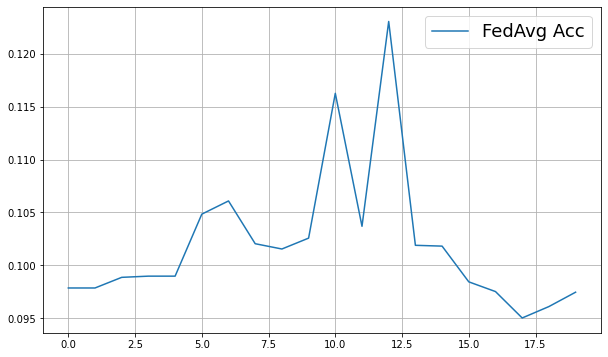

In [7]:
average_acc_list = []

for i in range(20):
    sum = 0
    for j in range(5):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum

    average_acc_list.append(sum/5)  


plt.figure(figsize=(10,6))
plt.plot(average_acc_list[:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

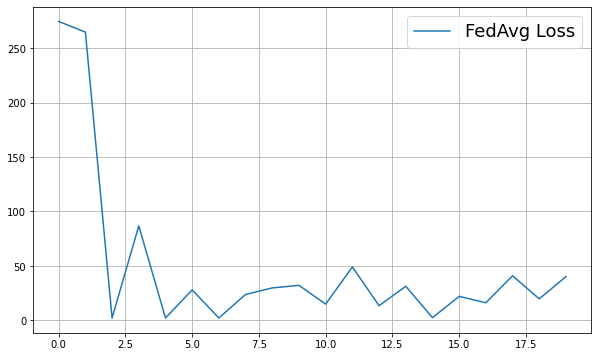

In [8]:
average_loss_list = []


for i in range(20):
    sum = 0
    for j in range(5):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum

    average_loss_list.append(sum/5)  


plt.figure(figsize=(10,6))
plt.plot(average_loss_list[:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()